<a href="https://www.kaggle.com/code/baba30/startup-fundining?scriptVersionId=167784285" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-startup-funding/startup_funding.csv


In [2]:
df = pd.read_csv("/kaggle/input/indian-startup-funding/startup_funding.csv")

In [3]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [5]:
df.drop("Remarks",axis=1,inplace=True)

In [6]:
df.set_index("Sr No",inplace=True)

In [7]:
df.head()

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [8]:
df.rename(columns={
    "Date dd/mm/yyyy":"date",
    "Startup Name":"startup",
    "Industry Vertical":"vertical",
    "SubVertical":"subvertical",
    "City  Location":"city",
    "Investors Name":"investors",
    "InvestmentnType":"round",
    "Amount in USD":"amount"
    
},inplace=True)

In [9]:
# conversion of amount to crore rupees 
# their are nan values to  im converting nan to 0
df["amount"]=df["amount"].fillna("0")

In [10]:
# df["amount"].astype("int")

as their are commas  and their are stings like Undisclosed or unknown it cant be converted so we need to use replace function instead 

In [11]:
df["amount"]= df["amount"].str.replace(",","")
df["amount"]= df["amount"].str.replace("Undisclosed","0")
df["amount"]= df["amount"].str.replace("unknown","0")
df["amount"]= df["amount"].str.replace("undisclosed","0")


In [12]:
#df["amount"].astype("float")  this is not working 
#lets change our methode to is digit
df = df[df["amount"].str.isdigit()]

In [13]:
df["amount"] =df["amount"].astype("int")

In [14]:
def to_rs(dollar):
    rs =dollar*82.94
    return rs/10000000

In [15]:
df["amount"]=df["amount"].apply(to_rs)

lets ee date column
its a string so we need to convert it to date time in the 
"05/072018" their are dates like this also where / is missing 
so we need to insert the / 

In [16]:
df["date"] = df["date"].str.replace("05/072018","05/07/2018")

In [17]:
df["date"]= pd.to_datetime(df["date"], format="%d/%m/%Y",errors="coerce")

In [18]:
df["date"].dt.year
df["date"].dt.month

Sr No
1       1.0
2       1.0
3       1.0
4       1.0
5       1.0
       ... 
3040    1.0
3041    1.0
3042    1.0
3043    1.0
3044    1.0
Name: date, Length: 3029, dtype: float64

In [19]:
df.sample(5)

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1839,2016-03-07,Ninjacart,ECommerce,B2B marketplace for Farmers & Retailers,Bangalore,"Accel Partners, Qualcomm Ventures, M&S Partner...",Private Equity,24.8820
875,2017-04-08,WonderChef,eCommerce,Online marketplace for kitchen products,Mumbai,Labruyere Eberl\\xc3\\xa9,Private Equity,0.0000
517,2017-11-27,Smaaash,Technology,Virtual Reality based gaming platform,Mumbai,Sixth Sense Ventures,Private Equity,31.5172
193,2018-07-05,Loan Tap,Consumer Internet,Online Lending Platform For Salaried Professio...,Mumbai,"Shunwei Capital, Tuscan Ventures, Ashish Goenk...",Private Equity,51.8375
1469,2016-08-24,ShaadiSaga,Consumer Internet,Wedding Website Creator,New Delhi,"ah! Ventures, Anupam Mittal, Kunal Shah, Sande...",Seed Funding,0.0000


removing less than  missing  value but im considering it is less than 10 %

In [20]:
df = df.dropna(subset=["date","startup","vertical","investors","round","city","amount"])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2819 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2819 non-null   datetime64[ns]
 1   startup      2819 non-null   object        
 2   vertical     2819 non-null   object        
 3   subvertical  2078 non-null   object        
 4   city         2819 non-null   object        
 5   investors    2819 non-null   object        
 6   round        2819 non-null   object        
 7   amount       2819 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 198.2+ KB


In [22]:
df.to_csv("startup_little_clean.csv",index= False )

In [23]:
(df["investors"].str.split(',').sum())

['Tiger Global Management',
 'Susquehanna Growth Equity',
 'Sequoia Capital India',
 'Vinod Khatumal',
 'Sprout Venture Partners',
 'Chiratae Ventures',
 'Ant Financial',
 'Sathguru Catalyzer Advisors',
 'Ping An Global Voyager Fund',
 'Mumbai Angels',
 ' Ravikanth Reddy',
 'SAIF Partners',
 ' Spring Canter Investment Ltd.',
 'Paytm',
 ' NPTK',
 ' Sabre Partners and Neoplux',
 'Vertex Growth Fund',
 'Ruizheng Investment',
 'Manipal Education and Medical Group (MEMG)',
 'SoftBank Vision Fund',
 'Sequoia',
 ' CapitalG',
 ' Accel',
 'Sauce.vc',
 ' Rainforest Ventures',
 'Prime Venture Partners',
 ' LetsVenture',
 ' PS1 Venture and GlobalLogic co-founder Rajul Garg',
 'RB Investments',
 'DG Daiwa Ventures',
 ' DG Incubation',
 'Trifecta Capital Advisors',
 'FinTech',
 'Dream Incubator',
 'Altimeter Capital',
 ' Sutter Hill Ventures',
 'Startup Buddy',
 'Amour Infrastructure',
 'Ackermans & van Haaren',
 ' HealthQuad',
 ' Rebright Partners',
 ' Toppan Printing',
 'Matrix Partners',
 ' Stell

In [24]:
set(df["investors"].str.split(',').sum())

{'',
 ' Sachin Bansal',
 'Equanimity Venture Fund',
 'Flipkart',
 ' Amit Ranjan',
 'Kunal Bajaj',
 'Atulya Mittal',
 ' New Enterprise Associates',
 'Swastika',
 '\\\\xc2\\\\xa0 Aarin Capital',
 'Sequoia Capital and Temasek Holdings',
 ' Mahesh Kothurkar',
 'Calcutta Angel Network',
 ' Mariwala family',
 '\\\\xc2\\\\xa0 Lok Capital',
 'Firoze Irani',
 ' Neelesh Bhatnagar',
 'B M Gupta',
 ' India Internet Fund',
 ' Cyber Carrier VC',
 ' Inc',
 'Anand Sankeshwar',
 ' Canaan Partners',
 ' Pameela P',
 'Treebo',
 ' Ankur Capital',
 ' HealthQuad and Fireside Ventures',
 ' Aditya Aggarwal',
 'R M Picture Company Pvt. Ltd.',
 'CoCreate Ventures',
 'Shiva Ashok & Other unnamed investors',
 ' FreshMenu)',
 'IDG Ventures India',
 ' Yogesh Andlay',
 'Sachin Bansal',
 ' New India Investment Corporation',
 'Das Capital',
 ' Sudhir Mallem',
 'GEMs Advisory',
 'Ashish Mahajan',
 ' Apoletto Managers',
 ' Shailesh Viswanathan',
 ' Li Jian',
 'Viraj Tyagi & others',
 ' Sanjeev Singhal',
 'Nexus',
 'CCube

In [25]:
len(set(df["investors"].str.split(',').sum()))

3457

In [26]:
sorted(set(df["investors"].str.split(',').sum()))

['',
 ' & Others',
 ' 100 Co-founders Lab and others.',
 ' 122 West Ventures',
 ' 1Crowd',
 ' 3ONE4 Capital Advisors',
 ' 3one4 Capital',
 ' 3one4 Capital Advisors LLP',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 500 Startups & Other HNIs',
 ' 50K Ventures & others',
 ' 91SpringBoard',
 ' 91springboard',
 ' ABB Technology Ventures',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' AL Nour International Holdings and Mark V Investments',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhijit Bhandari',
 ' Abhinav Patodia',
 ' Abhinav Sinha',
 ' Abhishek Acharya',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishek Jain',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Abu Farhan Azmi',
 ' Accel',
 ' Accel India',
 ' Accel Partner',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners & Raghunandan Gangappa',
 ' Accel Partners & existing investor

In [27]:
df[df["investors"].str.contains("IDG Ventures")][['date', 'startup', 'vertical', 'city', 'round', 'amount']]


,date,startup,vertical,city,round,amount
Sr No,,,,,,
102,2019-04-13,Tripoto,Social Media,New Delhi,Series B,29.786864
223,2018-07-30,Cure Fit,Consumer Internet,Bengaluru,Private Equity,995.280000
259,2018-05-02,Bizongo,Consumer Internet,Mumbai,Private Equity,182.468000
310,2018-04-26,POPxo,Technology,Delhi,Private Equity,45.617000
439,2017-12-07,eShakti,Ecommerce,Chennai,Debt Funding,19.076200
478,2017-11-04,Hevo Data,Technology,Bangalore,Private Equity,8.294000
479,2017-11-06,Smart Karma,Technology,Bangalore,Private Equity,0.000000
490,2017-11-09,Mobiliz AR,Technology,Bangalore,Private Equity,0.000000
505,2017-11-21,Heckyl,Technology,Mumbai,Private Equity,22.393800


In [28]:
# top 5 investments of idg 
df[df["investors"].str.contains("IDG Ventures")].head()[['date', 'startup', 'vertical', 'city', 'round', 'amount']]


,date,startup,vertical,city,round,amount
Sr No,,,,,,
102,2019-04-13,Tripoto,Social Media,New Delhi,Series B,29.786864
223,2018-07-30,Cure Fit,Consumer Internet,Bengaluru,Private Equity,995.280000
259,2018-05-02,Bizongo,Consumer Internet,Mumbai,Private Equity,182.468000
310,2018-04-26,POPxo,Technology,Delhi,Private Equity,45.617000
439,2017-12-07,eShakti,Ecommerce,Chennai,Debt Funding,19.076200


In [29]:
#  total amounts invested by IDG
top5_IDG =df[df["investors"].str.contains("IDG Ventures")].groupby("startup")["amount"].sum().sort_values(ascending=False).head()
top5_IDG

startup
Cure Fit    995.28
Lenskart    497.64
Bizongo     207.35
CureFit     207.35
Curefit     124.41
Name: amount, dtype: float64

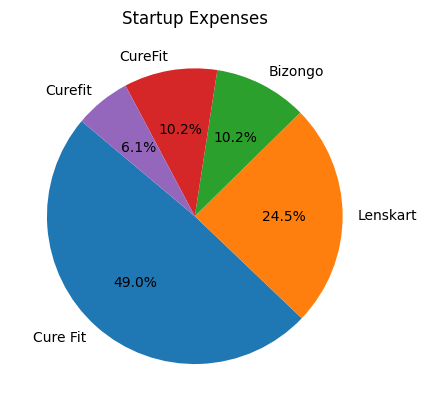

In [30]:
import matplotlib.pyplot as plt 
top5_IDG.plot.pie(autopct='%1.1f%%', startangle=140)
plt.ylabel('')
plt.title('Startup Expenses')
plt.show()


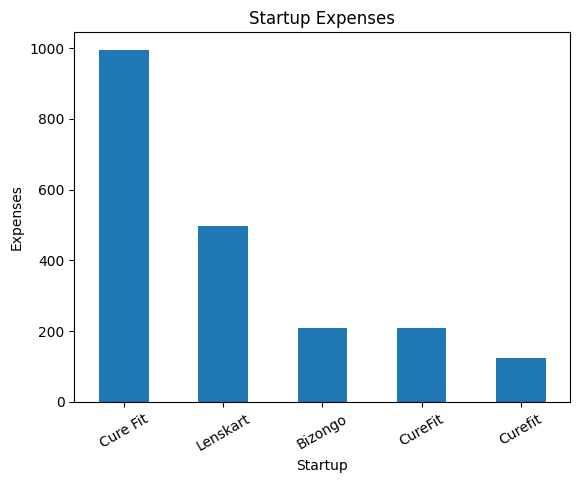

In [31]:
top5_IDG.plot(kind='bar')
plt.xlabel('Startup')
plt.ylabel('Expenses')
plt.title('Startup Expenses')
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.show()

In [32]:
df[df["investors"].str.contains("IDG Ventures")]["vertical"]

Sr No
102                                          Social Media
223                                     Consumer Internet
259                                     Consumer Internet
310                                            Technology
439                                             Ecommerce
478                                            Technology
479                                            Technology
490                                            Technology
505                                            Technology
528                                     Consumer Internet
660                                            Technology
673                                     Consumer Internet
699                                            Technology
948                                     Consumer Internet
962                                     Consumer Internet
964                                     Consumer Internet
1012                                           Technology
1061    

<Axes: ylabel='amount'>

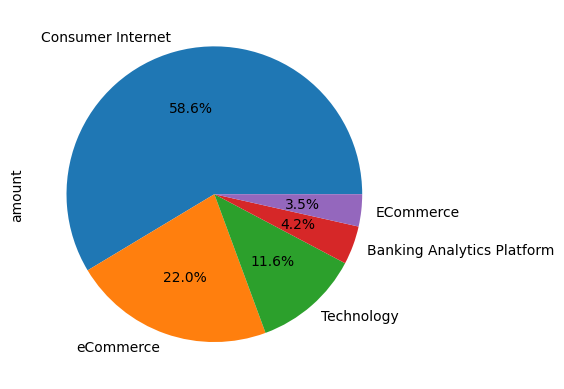

In [33]:
df[df["investors"].str.contains("IDG Ventures")].groupby("vertical")["amount"].sum().sort_values(ascending=False).head().plot(kind="pie",autopct='%1.1f%%')

<Axes: xlabel='round'>

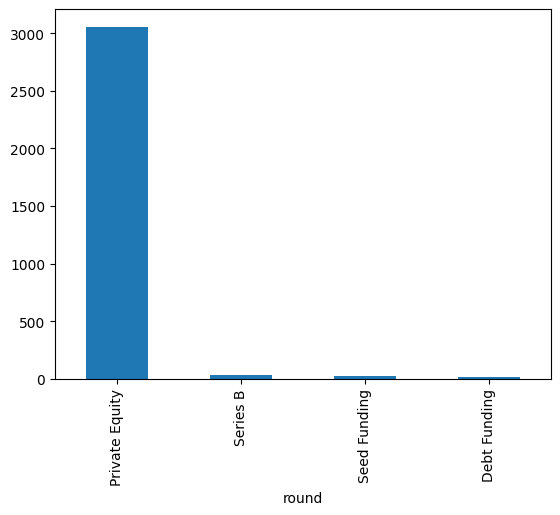

In [34]:
df[df["investors"].str.contains("IDG Ventures")].groupby("round")["amount"].sum().sort_values(ascending=False).head().plot(kind="bar")

<Axes: ylabel='amount'>

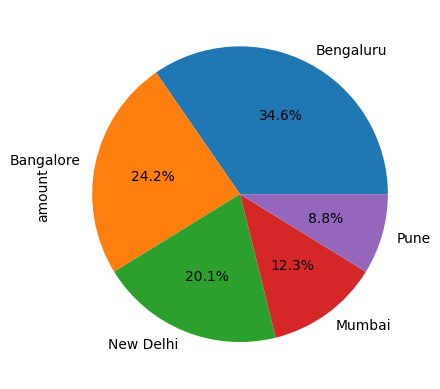

In [35]:
df[df["investors"].str.contains("IDG Ventures")].groupby("city")["amount"].sum().sort_values(ascending=False).head().plot(kind="pie",autopct='%1.1f%%')

In [36]:
# year on year investment grapgh

df["year"]= df["date"].dt.year
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount,year
Sr No,,,,,,,,,
1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1658.800000,2020
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.753380,2020
3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,152.268385,2020
4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.882000,2020
5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.929200,2020


<Axes: xlabel='year'>

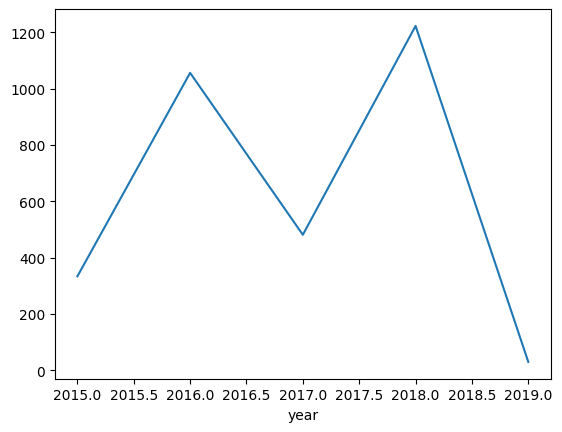

In [37]:
df[df["investors"].str.contains("IDG Ventures")].groupby("year")["amount"].sum().head().plot()

In [38]:
#it was high in 2016 and  investments got a raised again in 2018

general analysis 

In [39]:
round(df["amount"].sum())

298052

In [40]:
# maximum amount infused 
df.groupby("startup")["amount"].max().sort_values(ascending=False).head()
# Rapido Bike Taxi with amount of     32346.60
#Flipkart       with amount of     20735.00
# Paytm  with amount of 11611.60

startup
Rapido Bike Taxi    32346.60
Flipkart            20735.00
Paytm               11611.60
Flipkart.com         5805.80
Udaan                4851.99
Name: amount, dtype: float64

In [41]:
#  average amount funding on indian startups  
df.groupby("startup")["amount"].sum().mean()

129.7572271411798

In [42]:
#month on moth graph
df["month"]=df["date"].dt.month



In [43]:
df.groupby(["year","month"])["startup"].count().reset_index()

,year,month,startup
0,2015,4,61
1,2015,5,55
2,2015,6,84
3,2015,7,85
4,2015,8,98
5,2015,9,87
6,2015,10,93
7,2015,11,90
8,2015,12,88
9,2016,1,104


In [44]:
temp_df= df.groupby(["year","month"])["amount"].count().reset_index()

In [45]:
temp_df["x_axis"]=temp_df["month"].astype("str")+ "-"+temp_df["year"].astype("str")

In [46]:
temp_df[['amount','x_axis']]

,amount,x_axis
0,61,4-2015
1,55,5-2015
2,84,6-2015
3,85,7-2015
4,98,8-2015
5,87,9-2015
6,93,10-2015
7,90,11-2015
8,88,12-2015
9,104,1-2016
